In [2]:
import pandas as pd
import numpy as np
import pyreadr
from scipy.spatial import distance
from tqdm import tqdm

import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

In [3]:
#main = pyreadr.read_r('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/analysis.Rdata')
main = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/analysis.Rdata') #read R dataframe into Python

df_full = pd.DataFrame(main['forest_full'])
#df = df_full.sample(5000)

df = df_full

In [4]:
df.shape

(2427898, 35)

## Economic Data

In [8]:
df['PIB'] = df['pib_pc'] * df['populacao']

In [9]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1])).values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Labor and Social Security (RAIS) Data

In [10]:
rais_read = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/rais_setor_munic.Rdata')
rais_df = pd.DataFrame(rais_read['rais3'])
rais_df.head()

,id_municipio,ano,n_empresas_ADMIN PUBLICA,n_empresas_AGRICULTURA,n_empresas_ALIMENTOS E BEBIDAS,n_empresas_ALOJAMENTO E ALIMENTACAO,n_empresas_ALUGUEL EQUIPAMENTO,n_empresas_ATACADO,n_empresas_ATIVIDADES ASSOCIATIVAS,n_empresas_AUTOMOVEIS E TRANSPORTE,...,n_empregos_IMOBILIARIA,n_empregos_RECICLAGEM,n_empregos_COUROS E CALCADO,n_empregos_BORRACHA E PLASTICO,n_empregos_TEXTEIS,n_empregos_PESQUISA E DESENVOLVIMENTO,n_empregos_TRANSPORTE AEREO,n_empregos_FUMO,n_empregos_REFINO PETROLEO,n_empregos_
0,1100015,2000,2,27,15,13,1,38,126,5,...,0,0,0,0,0,0,0,0,0,0
1,1100015,2001,3,32,17,10,1,40,118,4,...,0,0,0,0,0,0,0,0,0,0
2,1100015,2002,3,45,23,13,0,39,127,4,...,0,0,0,0,0,0,0,0,0,0
3,1100015,2003,2,65,23,13,0,33,109,4,...,0,0,0,0,0,0,0,0,0,0
4,1100015,2004,2,83,44,10,1,29,110,3,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#english names of columns 
rais_df.columns = ['id_municipio', 'ano', 
       'n_companies_PUBLIC ADMIN',
       'n_companies_AGRICULTURE', 'n_companies_FOOD AND DRINKS',
       'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT', 'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD', 'n_companies_NON-METALLIC MINERAL PRODUCTS',
       'n_companies_HEALTH', 'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION', 'n_companies_RETAIL',
       'n_companies_COMPUTING', 'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER',
       'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR', 'n_companies_RUBBER AND PLASTIC',
       'n_companies_TEXTILES', 'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
                   
       'n_jobs_PUBLIC ADMIN',
       'n_jobs_AGRICULTURE', 'n_jobs_FOOD AND DRINKS',
       'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING',
       'n_jobs_WOOD PROD', 'n_jobs_NON-METALLIC MINERAL PRODUCTS',
       'n_jobs_HEALTH', 'n_jobs_SERVICES FOR COMPANIES',
       'n_jobs_PERSONAL SERVICES', 'n_jobs_TRANSPORTATION',
       'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING',
       'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES',
       'n_jobs_OIL AND GAS', 'n_jobs_FISHING AND AQUACULTURE',
       'n_jobs_CHEMICALS', 'n_jobs_WATER-BASED TRANSPORTATION',
       'n_jobs_REAL ESTATE', 'n_jobs_RECYCLING',
       'n_jobs_LEATHERS AND FOOTWEAR', 'n_jobs_RUBBER AND PLASTIC',
       'n_jobs_TEXTILES', 'n_jobs_RESEARCH AND DEVELOPMENT',
       'n_jobs_AERO TRANSPORT', 'n_jobs_SMOKE',
       'n_jobs_PETROLEUM REFINING', 'n_jobs_']

#sort the 51 categories of companies into industrial and service oriented

industrial_companies = ['n_companies_AGRICULTURE',
                    'n_companies_AUTOMOBILES AND TRANSPORT',
                    'n_companies_TRADE REP VEHICLES', 
                    'n_companies_WOOD PROD', 
                    'n_companies_NON-METALLIC MINERAL PRODUCTS',
                    'n_companies_BASIC METALLURGY', 
                    'n_companies_MINING',
                    'n_companies_TRANSPORTATION',
                    'n_companies_GROUND TRANSPORT',
                    'n_companies_WATER-BASED TRANSPORTATION',
                    'n_companies_AERO TRANSPORT',
                    'n_companies_CONSTRUCTION',
                    'n_companies_OIL AND GAS',
                    'n_companies_MACHINERY',
                    'n_companies_FORESTRY', 
                    'n_companies_ELECTRICITY AND GAS',
                    'n_companies_FISHING AND AQUACULTURE',
                    'n_companies_CHEMICALS', 
                    'n_companies_METALLIC PRODUCTS', 
                    'n_companies_PAPER',
                    'n_companies_WATER TREATMENT AND DISTRIBUTION', 
                    'n_companies_CLEANING AND SEWAGE', 
                    'n_companies_RECYCLING',
                    'n_companies_RUBBER AND PLASTIC', 
                    'n_companies_SMOKE',
                    'n_companies_PETROLEUM REFINING']

service_companies = ['n_companies_PUBLIC ADMIN',
                    'n_companies_FOOD AND DRINKS',
                    'n_companies_ACCOMODATION AND FOOD',
                    'n_companies_EQUIPMENT RENTAL', 
                    'n_companies_WHOLESALE',
                    'n_companies_LEATHERS AND FOOTWEAR',
                    'n_companies_TEXTILES',
                    'n_companies_ASSOCIATIVE ACTIVITIES',
                    'n_companies_FINANCIAL ASSISTANCE',
                    'n_companies_HEALTH', 
                    'n_companies_SERVICES FOR COMPANIES',
                    'n_companies_PERSONAL SERVICES', 
                    'n_companies_MAIL AND TELECOM', 
                    'n_companies_EDITING AND PRINTING', 
                    'n_companies_EDUCATION',
                    'n_companies_DOMESTIC SERVICES',
                    'n_companies_INSURANCE AND SOCIAL SECURITY',
                    'n_companies_RETAIL',
                    'n_companies_FINANCES',
                    'n_companies_CULTURE AND SPORT',
                    'n_companies_REAL ESTATE',
                    'n_companies_RESEARCH AND DEVELOPMENT',
                    'n_companies_COMPUTING',
                    'n_companies_CLOTHING', 
                    'n_companies_INTERNATIONAL BODIES',]

#sort the 51 categories of jobs into industrial and service oriented

industrial_jobs = ['n_jobs_AGRICULTURE',
                    'n_jobs_AUTOMOBILES AND TRANSPORT',
                    'n_jobs_TRADE REP VEHICLES', 
                    'n_jobs_WOOD PROD', 
                    'n_jobs_NON-METALLIC MINERAL PRODUCTS',
                    'n_jobs_BASIC METALLURGY', 
                    'n_jobs_MINING',
                    'n_jobs_TRANSPORTATION',
                    'n_jobs_GROUND TRANSPORT',
                    'n_jobs_WATER-BASED TRANSPORTATION',
                    'n_jobs_AERO TRANSPORT',
                    'n_jobs_CONSTRUCTION',
                    'n_jobs_OIL AND GAS',
                    'n_jobs_MACHINERY',
                    'n_jobs_FORESTRY', 
                    'n_jobs_ELECTRICITY AND GAS',
                    'n_jobs_FISHING AND AQUACULTURE',
                    'n_jobs_CHEMICALS', 
                    'n_jobs_METALLIC PRODUCTS', 
                    'n_jobs_PAPER',
                    'n_jobs_WATER TREATMENT AND DISTRIBUTION', 
                    'n_jobs_CLEANING AND SEWAGE', 
                    'n_jobs_RECYCLING',
                    'n_jobs_RUBBER AND PLASTIC', 
                    'n_jobs_SMOKE',
                    'n_jobs_PETROLEUM REFINING'   ]

service_jobs = ['n_jobs_PUBLIC ADMIN',
                    'n_jobs_FOOD AND DRINKS',
                    'n_jobs_ACCOMODATION AND FOOD',
                    'n_jobs_EQUIPMENT RENTAL', 
                    'n_jobs_WHOLESALE',
                    'n_jobs_LEATHERS AND FOOTWEAR',
                    'n_jobs_TEXTILES',
                    'n_jobs_ASSOCIATIVE ACTIVITIES',
                    'n_jobs_FINANCIAL ASSISTANCE',
                    'n_jobs_HEALTH', 
                    'n_jobs_SERVICES FOR COMPANIES',
                    'n_jobs_PERSONAL SERVICES', 
                    'n_jobs_MAIL AND TELECOM', 
                    'n_jobs_EDITING AND PRINTING', 
                    'n_jobs_EDUCATION',
                    'n_jobs_DOMESTIC SERVICES',
                    'n_jobs_INSURANCE AND SOCIAL SECURITY',
                    'n_jobs_RETAIL',
                    'n_jobs_FINANCES',
                    'n_jobs_CULTURE AND SPORT',
                    'n_jobs_REAL ESTATE',
                    'n_jobs_RESEARCH AND DEVELOPMENT',
                    'n_jobs_COMPUTING',
                    'n_jobs_CLOTHING', 
                    'n_jobs_INTERNATIONAL BODIES',]

#group 
rais_df['n_jobs_TOTAL INDUSTRIAL'] = rais_df[industrial_jobs].sum(axis=1)
rais_df['n_jobs_TOTAL SERVICE'] = rais_df[service_jobs].sum(axis=1)

rais_df['n_companies_TOTAL INDUSTRIAL'] = rais_df[industrial_companies].sum(axis=1)
rais_df['n_companies_TOTAL SERVICE'] = rais_df[service_companies].sum(axis=1)

companies_columns_list = ['n_companies_PUBLIC ADMIN',
       'n_companies_AGRICULTURE', 'n_companies_FOOD AND DRINKS',
       'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT', 'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD', 'n_companies_NON-METALLIC MINERAL PRODUCTS',
       'n_companies_HEALTH', 'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION', 'n_companies_RETAIL',
       'n_companies_COMPUTING', 'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER',
       'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR', 'n_companies_RUBBER AND PLASTIC',
       'n_companies_TEXTILES', 'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_']

rais_df['n_companies_TOTAL'] = rais_df[companies_columns_list].sum(axis=1)

jobs_columns_list = ['n_jobs_PUBLIC ADMIN',
       'n_jobs_AGRICULTURE', 'n_jobs_FOOD AND DRINKS',
       'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING',
       'n_jobs_WOOD PROD', 'n_jobs_NON-METALLIC MINERAL PRODUCTS',
       'n_jobs_HEALTH', 'n_jobs_SERVICES FOR COMPANIES',
       'n_jobs_PERSONAL SERVICES', 'n_jobs_TRANSPORTATION',
       'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING',
       'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES',
       'n_jobs_OIL AND GAS', 'n_jobs_FISHING AND AQUACULTURE',
       'n_jobs_CHEMICALS', 'n_jobs_WATER-BASED TRANSPORTATION',
       'n_jobs_REAL ESTATE', 'n_jobs_RECYCLING',
       'n_jobs_LEATHERS AND FOOTWEAR', 'n_jobs_RUBBER AND PLASTIC',
       'n_jobs_TEXTILES', 'n_jobs_RESEARCH AND DEVELOPMENT',
       'n_jobs_AERO TRANSPORT', 'n_jobs_SMOKE',
       'n_jobs_PETROLEUM REFINING', 'n_jobs_']

rais_df['n_jobs_TOTAL'] = rais_df[jobs_columns_list].sum(axis=1)

In [12]:
rais_df[jobs_columns_list] = rais_df[jobs_columns_list].div(rais_df.n_jobs_TOTAL, axis=0)
rais_df[companies_columns_list] = rais_df[companies_columns_list].div(rais_df.n_companies_TOTAL, axis=0)
rais_df.head()

,id_municipio,ano,n_companies_PUBLIC ADMIN,n_companies_AGRICULTURE,n_companies_FOOD AND DRINKS,n_companies_ACCOMODATION AND FOOD,n_companies_EQUIPMENT RENTAL,n_companies_WHOLESALE,n_companies_ASSOCIATIVE ACTIVITIES,n_companies_AUTOMOBILES AND TRANSPORT,...,n_jobs_AERO TRANSPORT,n_jobs_SMOKE,n_jobs_PETROLEUM REFINING,n_jobs_,n_jobs_TOTAL INDUSTRIAL,n_jobs_TOTAL SERVICE,n_companies_TOTAL INDUSTRIAL,n_companies_TOTAL SERVICE,n_companies_TOTAL,n_jobs_TOTAL
0,1100015,2000,0.003711,0.050093,0.027829,0.024119,0.001855,0.070501,0.233766,0.009276,...,0.0,0.0,0.0,0.0,336,860,118,421,539,1196
1,1100015,2001,0.005525,0.058932,0.031308,0.018416,0.001842,0.073665,0.217311,0.007366,...,0.0,0.0,0.0,0.0,355,830,124,419,543,1185
2,1100015,2002,0.004992,0.074875,0.038270,0.021631,0.000000,0.064892,0.211314,0.006656,...,0.0,0.0,0.0,0.0,418,1022,145,456,601,1440
3,1100015,2003,0.003190,0.103668,0.036683,0.020734,0.000000,0.052632,0.173844,0.006380,...,0.0,0.0,0.0,0.0,477,1152,163,464,627,1629
4,1100015,2004,0.003125,0.129688,0.068750,0.015625,0.001563,0.045312,0.171875,0.004687,...,0.0,0.0,0.0,0.0,516,1094,180,460,640,1610


In [13]:
df = pd.merge(df, rais_df,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','ano'])

In [14]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1])).values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Year Deforest Data Set

In [15]:
# Mojui Dos Campos is a newly-created municipality, liberated from Santarem in 2006
#fill in the missing points with the munipcality that is closest to it before the name change

mojui = df[df.ID == 1504752]
print(np.unique(mojui.ano))
inds_list = mojui.index

[2013 2014 2015 2016]


In [16]:
#for each missing element, find the point that was closest to it before it changed names
#fill in the information from that muni from year_deforest to fill in the nas of that row!

for i in tqdm(inds_list):  
    

    this_x = mojui.x[i]
    this_y = mojui.y[i]
    this_year = mojui.year[i]

    mojui_id = 1504752

    prior_to_change = df[df.year < 2013]

    closest_point = np.argmin((distance.cdist([(this_x, this_y)], list(zip(prior_to_change.x, prior_to_change.y)))))

    df.loc[i, 'ID'] = df.iloc[closest_point].ID



100%|██████████| 672/672 [36:25<00:00,  3.25s/it]


In [17]:
#check the id of the new ones here, sanity check should be santarem's id! 

In [30]:
#merge in year deforest
result1 = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/year_deforest.RData')
df2 = pd.DataFrame(result1['year_deforest'])

#df2 = df2.fillna(0)
df2 = df2.drop(['term', 'inc', 'area', 'per', 'murder_threats', 'assassination', 'assassination_attempt', 'f_emitted_count'], axis = 1)
df2 = df2.drop_duplicates()
df2['audits'] = df2['audits'].fillna(0)
df2.head()


,year,munic_id,emiss_agr,emiss_agropec,emiss_pec,expen_agri,expen_env_man,expen_agr_org,expen_mining,expen_petrol,expen_prom_ani_pro,expen_prom_veg_pro,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits
0,2000,1100015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,2000,1100023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.167599,0.0,1744.914255,0.0
2,2000,1100031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,2000,1100049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,2000,1100056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [31]:
subset_cols = ['year', 'munic_id']

# Find duplicated rows based on the subset of columns
duplicated_rows = df2[df2.duplicated(subset=subset_cols, keep=False)]

# Display the duplicated rows side by side for comparison
duplicated_rows_sorted = duplicated_rows.sort_values(by=subset_cols)
duplicated_rows_side_by_side = duplicated_rows_sorted.groupby(subset_cols).apply(lambda x: x.reset_index(drop=True))
duplicated_rows_side_by_side.head(20)

""


In [19]:
df = pd.merge(df, df2,  how = 'left', left_on = ['ID','year'], right_on = ['munic_id','year'])

In [20]:
#fill nas with 0 for audits
df['audits'] = df['audits'].fillna(0)



#now deal with missing emissions entries
# 3 emissions variables 'emiss_agr', 'emiss_agropec', 'emiss_pec',
#In the data, variable “atividade_economica” contains the values AGR, PEC and AGROPEC. 
#So, for each municipality/year, sum the emissions (emissao) that correspond to atividade_economica 
#== “AGROPEC”, “AGR” and “PEC” and that should give you the three variables.
# 
# #file_path = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/Rdata/emissions2016.Rdata'
file_path = '/Users/annieulichney/Desktop/Deforestation/emissions2016.Rdata'

emission2016 = pyreadr.read_r(file_path)
emdf = pd.DataFrame(emission2016['df.emissions'])
#emdf.head()

#agro + pec
both = emdf.loc[emdf['atividade_economica'].isin(['PEC', 'AGR'])][['ano', 'id_municipio', 'atividade_economica', 'emissao']]
both.columns = ['ano', 'id_municipio', 'atividade_economica', 'emissao_agropec_2016']


both['emissao_agropec_2016'] = both['emissao_agropec_2016'].fillna(0)

both_summed = pd.DataFrame(both.groupby(['ano', 'id_municipio'])['emissao_agropec_2016'].sum()).reset_index()

#change dtype
both_summed['id_municipio'] = both_summed['id_municipio'].astype(int)
both_summed['ano'] = both_summed['ano'].astype(int)

#both_summed.head()

#agro only
agro_df = emdf.loc[emdf['atividade_economica'].isin(['AGR'])][['ano', 'id_municipio', 'atividade_economica', 'emissao']]
agro_df.columns = ['ano', 'id_municipio', 'atividade_economica', 'emissao_agr_2016']


agro_df['emissao_agr_2016'] = agro_df['emissao_agr_2016'].fillna(0)

agro_df_summed = pd.DataFrame(agro_df.groupby(['ano', 'id_municipio'])['emissao_agr_2016'].sum()).reset_index()

#change dtype
agro_df_summed['id_municipio'] = agro_df_summed['id_municipio'].astype(int)
agro_df_summed['ano'] = agro_df_summed['ano'].astype(int)

#agro_df_summed.head()

#agro only
pec_df = emdf.loc[emdf['atividade_economica'].isin(['PEC'])][['ano', 'id_municipio', 'atividade_economica', 'emissao']]
pec_df.columns = ['ano', 'id_municipio', 'atividade_economica', 'emissao_pec_2016']


pec_df['emissao_pec_2016'] = pec_df['emissao_pec_2016'].fillna(0)

pec_df_summed = pd.DataFrame(pec_df.groupby(['ano', 'id_municipio'])['emissao_pec_2016'].sum()).reset_index()

#change dtype
pec_df_summed['id_municipio'] = pec_df_summed['id_municipio'].astype(int)
pec_df_summed['ano'] = pec_df_summed['ano'].astype(int)

#pec_df_summed.head()

#merge twice to get all 3 columns
emiss_df = pd.merge(agro_df_summed, both_summed,  how = 'left', left_on = ['id_municipio','ano'], right_on = ['id_municipio','ano'])
emiss_df = pd.merge(pec_df_summed, emiss_df,  how = 'left', left_on = ['id_municipio','ano'], right_on = ['id_municipio','ano'])


df = pd.merge(df, emiss_df,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','ano'])


df['emissao_pec_2016'] = df['emissao_pec_2016'].fillna(0)
df['emissao_agr_2016'] = df['emissao_agr_2016'].fillna(0)
df['emissao_agropec_2016'] = df['emissao_agropec_2016'].fillna(0)


df['emiss_pec'] = df['emiss_pec'].fillna(0)
df['emiss_agr'] = df['emiss_agr'].fillna(0)
df['emiss_agropec'] = df['emiss_agropec'].fillna(0)

df['emiss_pec_full'] = df['emiss_pec'] + df['emissao_pec_2016']
df['emiss_agr_full'] = df['emiss_agr'] + df['emissao_agr_2016']
df['emiss_agropec_full'] = df['emiss_agropec'] + df['emissao_agropec_2016']

df = df[['ID', 'forest.diff', 'FID', 'x', 'y', 'year', 'forest.l',
       'nn_forest.l', 'rain1', 'elevation', 'slope', 'aspect',
       'near_mines', 'near_roads', 'near_hidrovia', 'indigenous_homol',
       'mun_election_year', 'new_forest_code', 'lula', 'dilma', 'temer',
       'bolsonaro', 'fed_election_year', 'populacao', 'pib_pc', 'ironore',
       'silver', 'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs',
       'mining_jobs', 'public_jobs', 'construction_jobs', 'PIB','n_companies_PUBLIC ADMIN',
       'n_companies_AGRICULTURE', 'n_companies_FOOD AND DRINKS',
       'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT',
       'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD',
       'n_companies_NON-METALLIC MINERAL PRODUCTS', 'n_companies_HEALTH',
       'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION',
       'n_companies_RETAIL', 'n_companies_COMPUTING',
       'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER', 'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR',
       'n_companies_RUBBER AND PLASTIC', 'n_companies_TEXTILES',
       'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
       'n_jobs_PUBLIC ADMIN', 'n_jobs_AGRICULTURE',
       'n_jobs_FOOD AND DRINKS', 'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING', 'n_jobs_WOOD PROD',
       'n_jobs_NON-METALLIC MINERAL PRODUCTS', 'n_jobs_HEALTH',
       'n_jobs_SERVICES FOR COMPANIES', 'n_jobs_PERSONAL SERVICES',
       'n_jobs_TRANSPORTATION', 'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING', 'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES', 'n_jobs_OIL AND GAS',
       'n_jobs_FISHING AND AQUACULTURE', 'n_jobs_CHEMICALS',
       'n_jobs_WATER-BASED TRANSPORTATION', 'n_jobs_REAL ESTATE',
       'n_jobs_RECYCLING', 'n_jobs_LEATHERS AND FOOTWEAR',
       'n_jobs_RUBBER AND PLASTIC', 'n_jobs_TEXTILES',
       'n_jobs_RESEARCH AND DEVELOPMENT', 'n_jobs_AERO TRANSPORT',
       'n_jobs_SMOKE', 'n_jobs_PETROLEUM REFINING', 'n_jobs_',
       'n_jobs_TOTAL INDUSTRIAL', 'n_jobs_TOTAL SERVICE',
       'n_companies_TOTAL INDUSTRIAL', 'n_companies_TOTAL SERVICE',
       'n_companies_TOTAL', 'n_jobs_TOTAL', 
       'expen_agri', 'expen_env_man', 'expen_agr_org',
       'expen_mining', 'expen_petrol', 'expen_prom_ani_pro',
       'expen_prom_veg_pro', 'expen_other_agr', 'expen_agr_defense',
       'expen_min_fuel', 'illegal_mining', 'illegal_other',
       'illegal_industry', 'audits', 
       'emiss_pec_full', 'emiss_agr_full', 'emiss_agropec_full']]

In [21]:
df[df.murder_threats.isna()].groupby(['ID']).size()

ID
2102374.0     15
2103307.0    480
2109304.0     15
2111748.0     45
2112704.0     15
2211209.0     15
2911105.0     15
2928901.0     15
5204904.0     15
dtype: int64

In [22]:
#this removes codo the municipality that is not in the bounds of legal amazon
df = df[df.ID != 2103307]

In [23]:
df[df.murder_threats.isna()].groupby(['ID']).size()

ID
2102374.0    15
2109304.0    15
2111748.0    45
2112704.0    15
2211209.0    15
2911105.0    15
2928901.0    15
5204904.0    15
dtype: int64

In [24]:

sf = shp.Reader("/Users/annieulichney/Documents/GitHub/Deforestation/BR_Municipios_2020.shp")

def plot_muni(muni_df, muni_shape, id):
    plt.figure(figsize=(4, 3), dpi=80)

    temp3 = muni_df

    for shape in [muni_shape]:
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x,y)

    #temp4 = df[(df.y > min(y)) & (df.y < max(y)) & (df.x > min(x)) & (df.x < max(x))]
    temp4 = df[(df.murder_threats.isna() & (df.ID == id))]


    plt.plot(temp3.x, temp3.y, '.k', alpha = 0.3)
    plt.scatter(temp4.x, temp4.y, s = 30, color = 'red')
    plt.show()
    

In [25]:
all_muni_records = sf.shapeRecords()

#check out location of remaining NAs
Cachoeira_Grande = df[df.ID == 2102374.0]
Presidente_Vargas = df[df.ID == 2109304.0]
Senador_Alexandre_Costa = df[df.ID == 2111748.0]
Vargem_Grande = df[df.ID == 2112704.0]
Uruçuí = df[df.ID == 2211209.0]
Formosa_Do_Rio_Preto = df[df.ID == 2911105.0]
São_Desidério = df[df.ID == 2928901.0]
Campos_Belos = df[df.ID == 5204904.0]


for muni in all_muni_records:
    if muni.record[1] == 'Cachoeira Grande':
        Cachoeira_Grande_shape = muni
        print(1)
    if muni.record[1] == 'Presidente Vargas':
        Presidente_Vargas_shape = muni
        print(2)
    if muni.record[1] == 'Senador Alexandre Costa':
        Senador_Alexandre_Costa_shape = muni
        print(3)
    if muni.record[1] == 'Vargem Grande':
        Vargem_Grande_shape = muni
        print(4)
    if muni.record[1] == 'Uruçuí':
        Uruçuí_shape = muni
        print(5)
    if muni.record[0] == 1708205:
        Formosa_Do_Rio_Preto_shape = muni
        print(6)
    if muni.record[1] == 'São Desidério':
        São_Desidério_shape = muni
        print(7)
    if muni.record[1] == 'Campos Belos':
        Campos_Belos_shape = muni
        print(8)

1
2
3
4
5
7
8


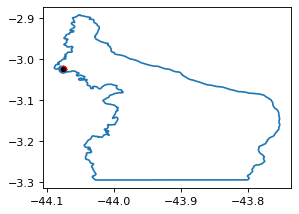

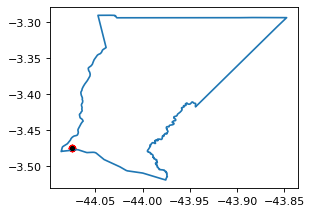

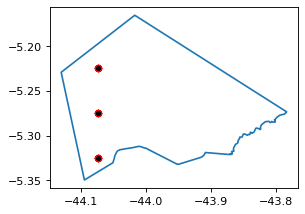

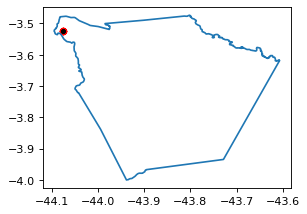

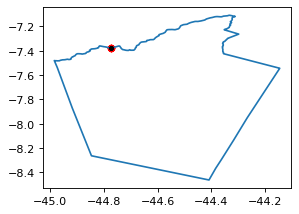

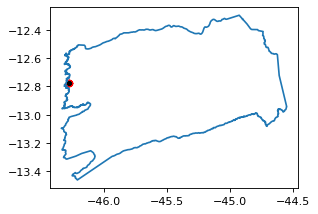

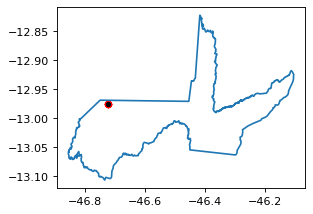

In [26]:
plot_muni(Cachoeira_Grande, Cachoeira_Grande_shape, 2102374)
plot_muni(Presidente_Vargas, Presidente_Vargas_shape, 2109304)
plot_muni(Senador_Alexandre_Costa, Senador_Alexandre_Costa_shape, 2111748)
plot_muni(Vargem_Grande, Vargem_Grande_shape, 2112704)
plot_muni(Uruçuí, Uruçuí_shape, 2211209)
#plot_muni(Formosa_Do_Rio_Preto, Formosa_Do_Rio_Preto_shape, 2911105)
plot_muni(São_Desidério, São_Desidério_shape, 2928901)
plot_muni(Campos_Belos, Campos_Belos_shape, 5204904)

#red dots are the nas in the data. They seem to be border points so we can discard them.

In [27]:
inds_to_drop = df[(df.murder_threats.isna() & (df.ID.isin([2102374, 2109304, 2111748, 2112704, 2211209, 2911105, 2928901, 5204904])))].index

In [28]:
df = df.drop(inds_to_drop, axis = 0)

In [29]:
df[df.murder_threats.isna()].groupby(['ID']).size()

Series([], dtype: int64)

In [30]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MAIL

In [31]:
#df.to_csv('MergedDataDroppedPoints.csv')

In [5]:
df = pd.read_csv('MergedDataDroppedPoints.csv')

In [6]:
df.head()

,Unnamed: 0,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,...,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits,emiss_pec_full,emiss_agr_full,emiss_agropec_full
0,0,1100015.0,0.0,8436645,-62.825,-12.925,2002,97.0,85.50,21.81664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0
1,1,1100015.0,16.0,8436646,-62.825,-12.875,2002,65.0,68.75,22.56391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0
2,2,1100015.0,5.0,8440244,-62.775,-12.975,2002,92.0,87.75,21.30135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0
3,3,1100015.0,9.0,8440245,-62.775,-12.925,2002,83.0,73.75,22.10585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0
4,4,1100015.0,13.0,8443844,-62.725,-12.975,2002,79.0,80.25,20.90614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488528.553429,5304.103889,4902816.0


## Crime Variables

## Political Variables

In [7]:
import pandas as pd

In [8]:
vote_full = pd.read_csv('PoliticalDataAnalysis.csv', index_col = 0)

In [9]:
vote_full.head()

,ano,id_municipio,incumbant,term_limited_seat,special,overall_winner_complete_college,overall_winner_idade,overall_winner_feminino,overall_winner_agriculture_job,overall_winner_public_service_job,...,runnerup_partido_PMDB_MDB,runnerup_partido_PSDB,runnerup_partido_DEM,runnerup_partido_PL,runnerup_partido_other,winner_votes,winner_votes_proportion,runnerup_votes,runnerup_votes_proportion,totalvotes
0,2004,2102200,1.0,0,0.0,0.0,45.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6582.0,0.551210,4807.0,11941.0,11941.0
1,2004,3203007,1.0,0,0.0,1.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10613.0,0.679449,5007.0,15620.0,15620.0
2,2004,3203106,1.0,0,0.0,0.0,67.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4176.0,0.597767,2810.0,6986.0,6986.0
3,2004,3203163,1.0,0,0.0,0.0,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5146.0,0.694280,2266.0,7412.0,7412.0
4,2004,5214838,1.0,0,0.0,0.0,40.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2638.0,0.437697,1954.0,6027.0,6027.0


In [10]:
vote_plus_one = vote_full.copy()
vote_plus_one['ano'] = vote_plus_one['ano'] + 1

vote_plus_two = vote_full.copy()
vote_plus_two['ano'] = vote_plus_two['ano'] + 2

vote_plus_three = vote_full.copy()
vote_plus_three['ano'] = vote_plus_three['ano'] + 3

vote_concat = pd.concat([vote_full, vote_plus_one, vote_plus_two, vote_plus_three])

In [11]:
df_trim = df[(df.year >= 2004) & (df.year <= 2016)]

In [12]:
df_pol = pd.merge(df_trim, vote_concat, how = 'left', left_on = ['ID', 'year'], right_on = ['id_municipio', 'ano'])

In [13]:
df_pol['runnerup_votes_proportion'] = df_pol.runnerup_votes / df_pol.totalvotes
df_pol['vote_participation_proportion'] = df_pol.totalvotes/df_pol.populacao

df_pol = df_pol.drop('totalvotes', axis = 1)
df_pol = df_pol.drop('winner_votes', axis = 1)
df_pol = df_pol.drop('runnerup_votes', axis = 1)
df_pol = df_pol.drop('ano', axis = 1)
df_pol = df_pol.drop('id_municipio', axis = 1)

In [14]:
if 'Unnamed: 0' in np.array(df_pol.columns):
    df_pol = df_pol.drop('Unnamed: 0', axis = 1)

In [15]:
df_pol.head()

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,overall_winner_partido_other,runnerup_partido_PT,runnerup_partido_PMDB_MDB,runnerup_partido_PSDB,runnerup_partido_DEM,runnerup_partido_PL,runnerup_partido_other,winner_votes_proportion,runnerup_votes_proportion,vote_participation_proportion
0,1100015.0,8.0,8436645,-62.825,-12.925,2004,84.0,70.75,23.39269,154.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5231,0.4769,0.464984
1,1100015.0,21.0,8436646,-62.825,-12.875,2004,48.0,62.75,24.21399,146.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5231,0.4769,0.464984
2,1100015.0,-19.0,8440244,-62.775,-12.975,2004,92.0,83.50,23.46420,156.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5231,0.4769,0.464984
3,1100015.0,12.0,8440245,-62.775,-12.925,2004,78.0,68.50,23.58431,156.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5231,0.4769,0.464984
4,1100015.0,0.0,8443844,-62.725,-12.975,2004,77.0,76.50,23.37501,155.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5231,0.4769,0.464984


In [16]:
dict(sorted((df_pol.isna().sum()).to_dict().items(), key=lambda item: item[1], reverse = True))

{'runnerup_votes_proportion': 31273,
 'overall_winner_idade': 13214,
 'incumbant': 81,
 'term_limited_seat': 81,
 'special': 81,
 'overall_winner_complete_college': 81,
 'overall_winner_feminino': 81,
 'overall_winner_agriculture_job': 81,
 'overall_winner_public_service_job': 81,
 'overall_winner_health_job': 81,
 'overall_winner_corporate_job': 81,
 'overall_winner_law_job': 81,
 'overall_winner_technical_job': 81,
 'overall_winner_professional_job': 81,
 'overall_winner_mining_job': 81,
 'overall_winner_partido_PT': 81,
 'overall_winner_partido_PMDB_MDB': 81,
 'overall_winner_partido_PSDB': 81,
 'overall_winner_partido_DEM': 81,
 'overall_winner_partido_PL': 81,
 'overall_winner_partido_other': 81,
 'runnerup_partido_PT': 81,
 'runnerup_partido_PMDB_MDB': 81,
 'runnerup_partido_PSDB': 81,
 'runnerup_partido_DEM': 81,
 'runnerup_partido_PL': 81,
 'runnerup_partido_other': 81,
 'winner_votes_proportion': 81,
 'vote_participation_proportion': 81,
 'ID': 0,
 'forest.diff': 0,
 'FID': 0,

In [17]:
df_pol[df_pol.runnerup_votes_proportion.isna()].groupby(['year']).size()

year
2004     583
2005     695
2006     695
2007     695
2008    6448
2009    6448
2010    6448
2011    6448
2012     545
2013     545
2014     545
2015     545
2016     633
dtype: int64

In [18]:
df_pol[df_pol.runnerup_votes_proportion.isna()].groupby(['ID']).size()

ID
1100031.0     176
1101401.0     260
1101807.0     128
1400027.0    3584
1500131.0      84
1500701.0     900
1501105.0     556
1501956.0     324
1502707.0     764
1503903.0    1072
1505502.0    2512
1505635.0     432
1505809.0    3304
1507409.0      64
1508407.0     488
1705557.0      24
1708254.0      84
1710904.0      41
1712157.0      72
1715002.0      56
1715259.0     352
1718865.0     224
1720937.0     148
2101103.0      28
2109700.0      81
2112456.0     192
5102686.0     912
5103361.0     372
5103809.0     132
5104500.0      80
5104526.0     336
5106224.0     318
5106257.0     193
5106307.0    6472
5106703.0     100
5107065.0    2376
5107198.0      88
5107792.0     504
5107875.0    1792
5108105.0     552
5108303.0     600
5108857.0     496
dtype: int64

## Mapbiomas

In [3]:
#Most relevant variables are forest_formation, forest_lag, forest_diff (= forest_formation - forest_lag) and def (=forest_diff if forest_diff<=0). 
map = pd.read_csv('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/mapbiomas_points.csv')

In [6]:
map.sample(n=30).head()[['forest_formation', 'forest_lag', 'def']]

,forest_formation,forest_lag,def
4490214,0.023995,0.023995,0.0
3768632,2.665895,2.665735,0.0
3043871,0.210504,0.205352,0.0
1989220,3.144578,3.144578,0.0
3661703,3.117989,3.117989,0.0


In [22]:
map[(map.forest_diff.isna())].groupby(['year']).size()

year
1987    163563
dtype: int64

In [23]:
df_map = pd.merge(df_pol, map, how = 'left', left_on = ['FID', 'year'], right_on = ['fid_1', 'year'])

In [24]:
df_map.head()

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,water,soybean,rice,other_crop,coffee,citrus,other_perennial,forest_lag,forest_diff,def
0,1100015.0,8.0,8436645,-62.825,-12.925,2004,84.0,70.75,23.39269,154.0,...,0.241447,0.0,0.0,0.0,0,0,0.0,2.740301,0.003488,0.0
1,1100015.0,21.0,8436646,-62.825,-12.875,2004,48.0,62.75,24.21399,146.0,...,0.000000,0.0,0.0,0.0,0,0,0.0,0.998124,0.014282,0.0
2,1100015.0,-19.0,8440244,-62.775,-12.975,2004,92.0,83.50,23.46420,156.0,...,0.000000,0.0,0.0,0.0,0,0,0.0,2.973196,0.000000,0.0
3,1100015.0,12.0,8440245,-62.775,-12.925,2004,78.0,68.50,23.58431,156.0,...,0.038767,0.0,0.0,0.0,0,0,0.0,2.923839,0.000872,0.0
4,1100015.0,0.0,8443844,-62.725,-12.975,2004,77.0,76.50,23.37501,155.0,...,0.076749,0.0,0.0,0.0,0,0,0.0,2.894867,0.003138,0.0


In [25]:
df_map[(df_map.forest_diff.isna())].groupby(['year']).size()

Series([], dtype: int64)

In [26]:
df_map[(df_map.forest_diff.isna())].groupby(['ID']).size()

Series([], dtype: int64)

In [27]:
df_map = df_map.drop(['fid_1', 'uniqid'], axis = 1)

In [28]:
np.array(df_map.columns)

array(['ID', 'forest.diff', 'FID', 'x', 'y', 'year', 'forest.l',
       'nn_forest.l', 'rain1', 'elevation', 'slope', 'aspect',
       'near_mines', 'near_roads', 'near_hidrovia', 'indigenous_homol',
       'mun_election_year', 'new_forest_code', 'lula', 'dilma', 'temer',
       'bolsonaro', 'fed_election_year', 'populacao', 'pib_pc', 'ironore',
       'silver', 'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs',
       'mining_jobs', 'public_jobs', 'construction_jobs', 'PIB',
       'n_companies_PUBLIC ADMIN', 'n_companies_AGRICULTURE',
       'n_companies_FOOD AND DRINKS', 'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT',
       'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRIN

In [29]:
dict(sorted((df_map.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MAIL

In [30]:
for year in [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    filename1 = f'/{str(year)}_1.csv'
    filename2 = f'/{str(year)}_2.csv'
    filename3 = f'/{str(year)}_3.csv'
    filename4 = f'/{str(year)}_4.csv'

    # "    filename1 = f'FinalData/FinalData{str(year)}_1.csv'\n",
    # "    filename2 = f'FinalData/FinalData{str(year)}_2.csv'\n",
    # "    filename3 = f'FinalData/FinalData{str(year)}_3.csv'\n",
    # "    filename4 = f'FinalData/FinalData{str(year)}_4.csv'\n",

    this_year_df = df_map[df_map.year == year]

    num_rows = len(this_year_df)
    quarter_rows = num_rows // 4

    this_year_df.iloc[:quarter_rows].to_csv(filename1)
    this_year_df.iloc[quarter_rows:2*quarter_rows].to_csv(filename2)
    this_year_df.iloc[2*quarter_rows:3*quarter_rows].to_csv(filename3)
    this_year_df.iloc[3*quarter_rows:].to_csv(filename4)
